In [2]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [ ]:
# !git clone https://github.com/pankaj-lewagon/ser.git

# %cd ser
# import sys, os
# sys.path.append(os.getcwd())


In [1]:
import os
import glob
import numpy as np
import librosa
import soundfile
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from librosa import display
import IPython.display as ipd

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [6]:
path ='../raw_data/ravdess_data'

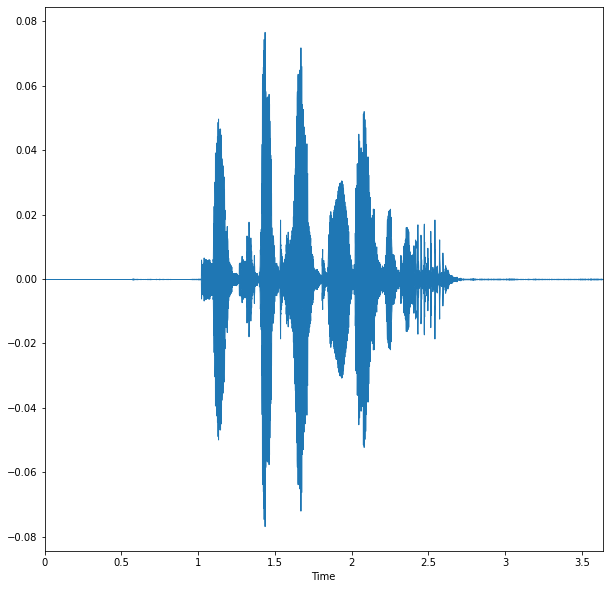

In [8]:
file = path + '/Actor_02/03-01-01-01-01-01-02.wav'

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
data, sample_rate = librosa.load(file)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(file)



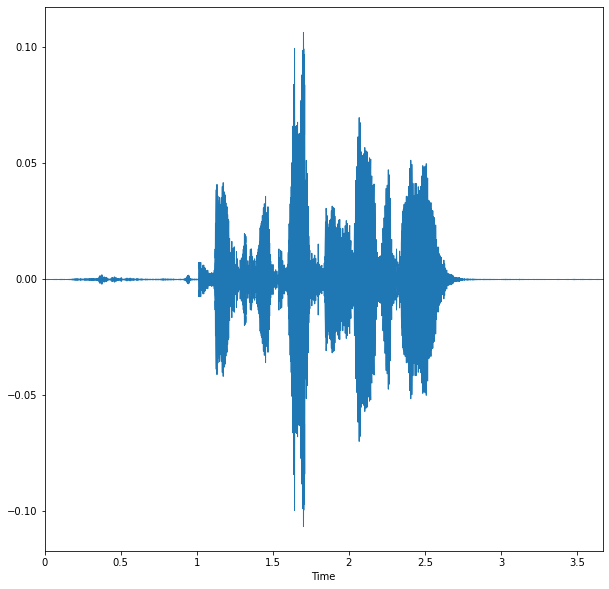

In [9]:
file = path + '/Actor_01/03-01-06-01-01-01-01.wav'

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
data, sample_rate = librosa.load(file)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(file)


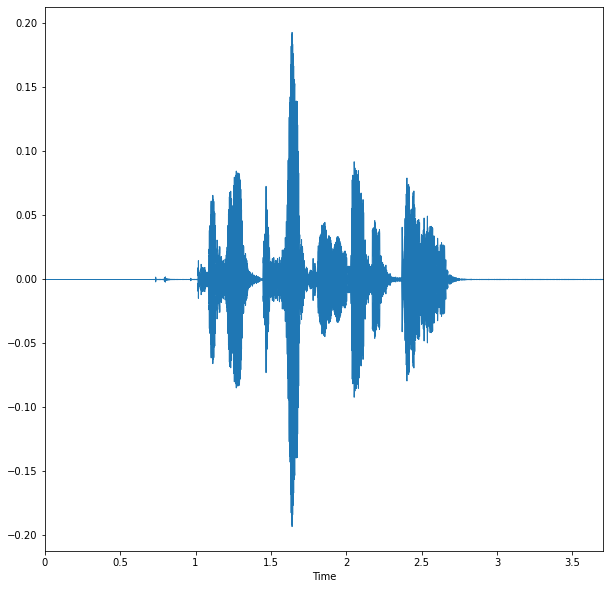

In [10]:
file = path + '/Actor_04/03-01-05-01-01-01-04.wav'

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
data, sample_rate = librosa.load(file)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(file)


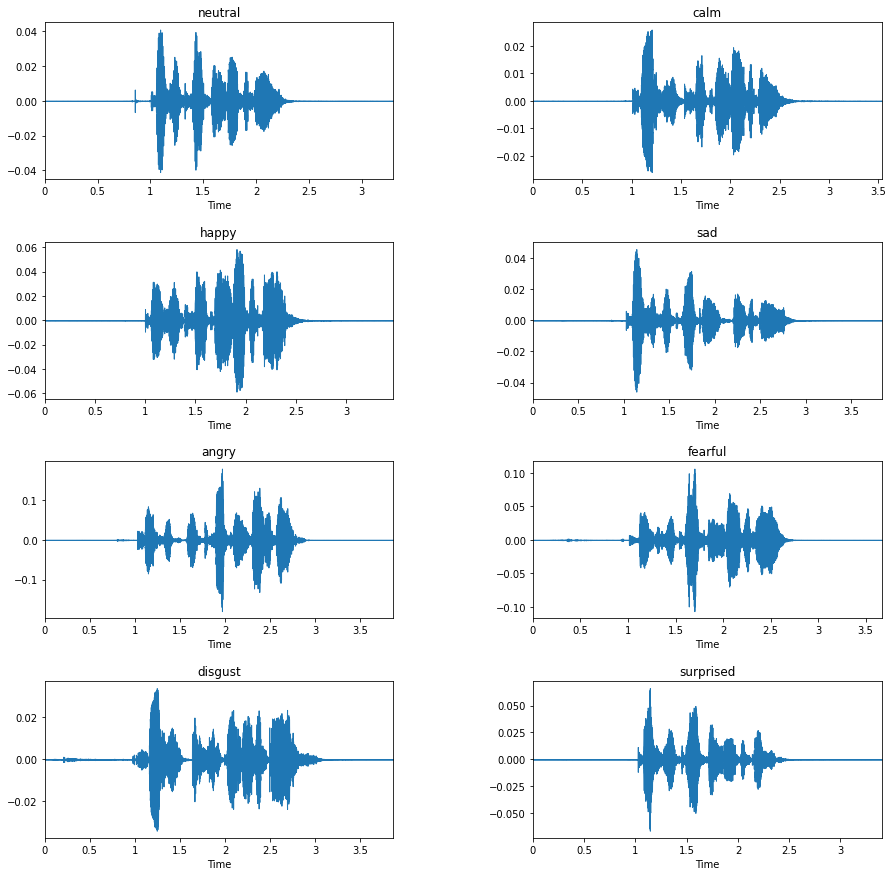

In [11]:
fig = plt.figure(figsize=(15,15))# Log graphic of waveforms to Comet

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
  filename = path + f'/Actor_01/03-01-{i}-01-01-01-01.wav'
  fig.add_subplot(4, 2, int(i))
  plt.title(emotions[i])
  data, sample_rate = librosa.load(filename)
  librosa.display.waveplot(data, sr=sample_rate)




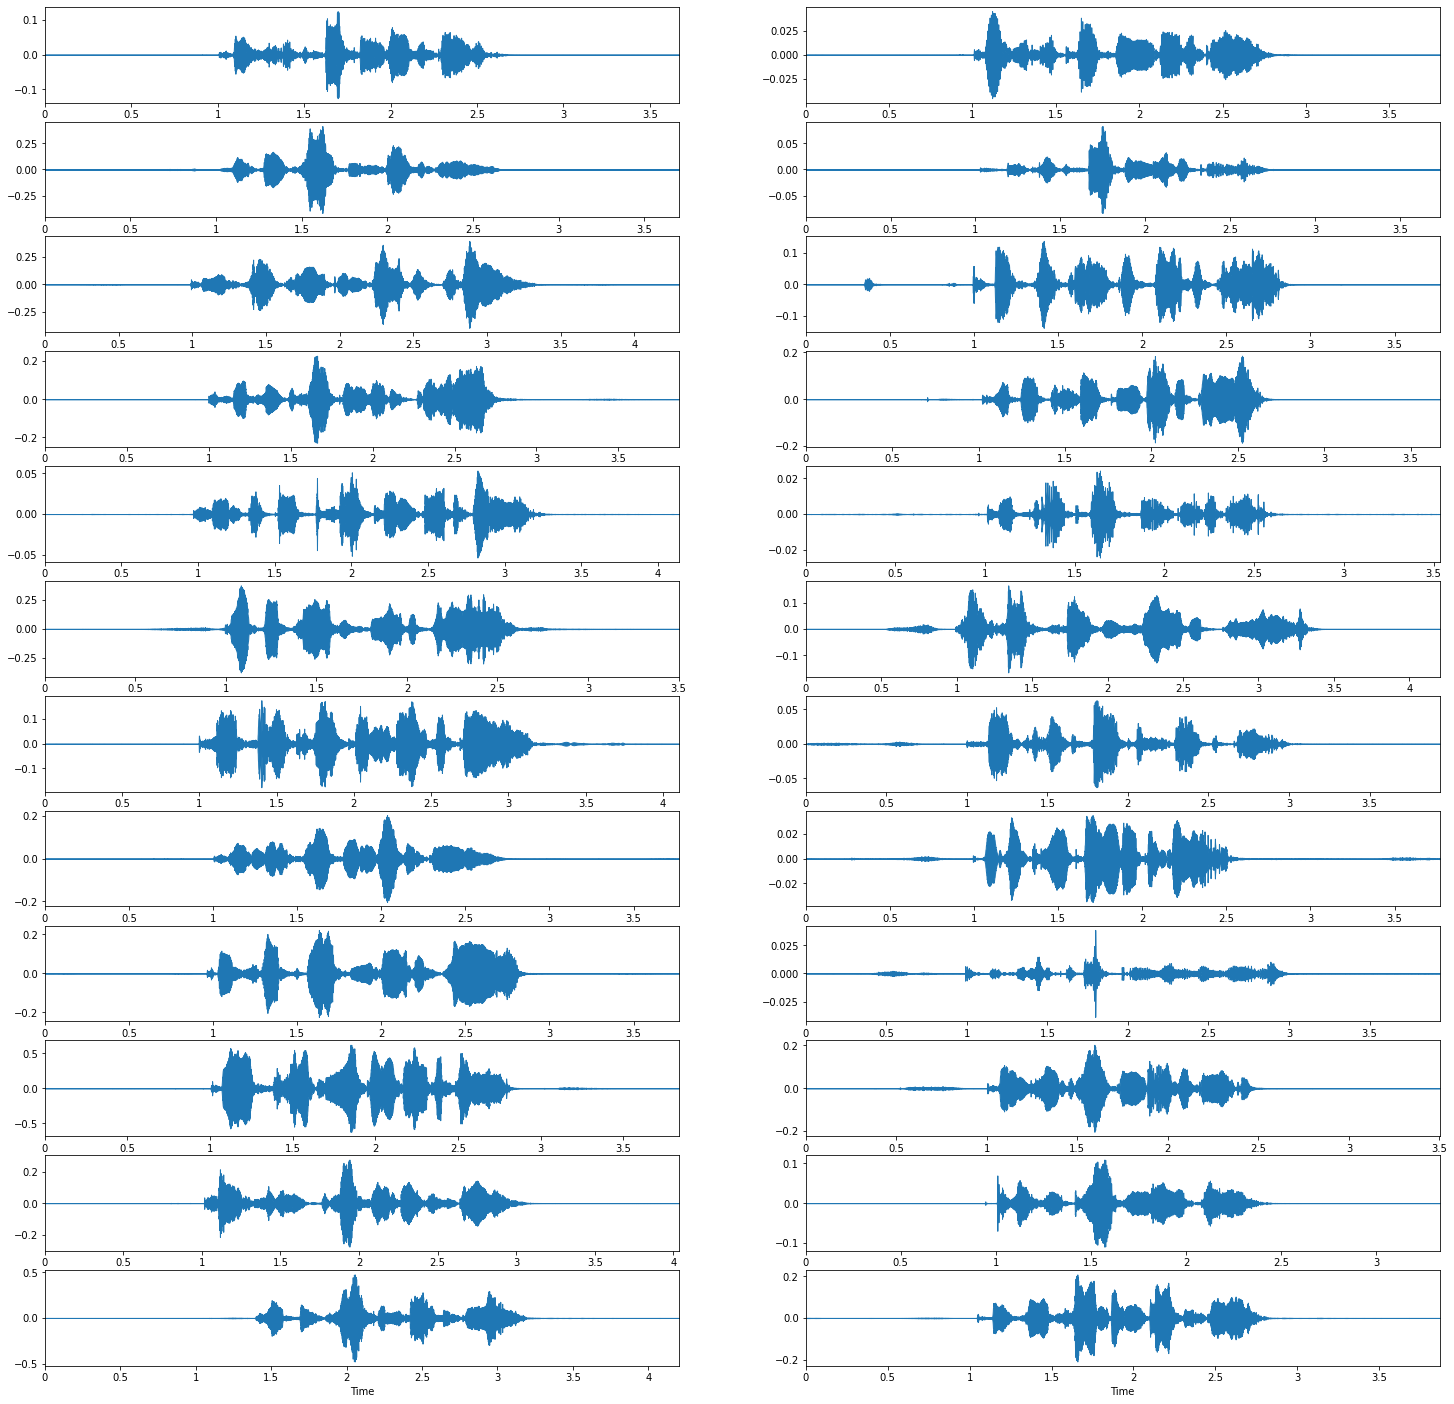

In [12]:
#happy and sad waveforms for first 12 actors

fig = plt.figure(figsize=(25,25))# Log graphic of waveforms to Comet

for i in range(12):

  if i<9:
    stringlet = f'0{str(i+1)}'
  else:
    stringlet = str(i+1)

  filename1 = path + f'/Actor_{stringlet}/03-01-03-02-01-01-{stringlet}.wav'
  filename2 = path + f'/Actor_{stringlet}/03-01-04-02-01-01-{stringlet}.wav'
  fig.add_subplot(12, 2, 2*(i+1)-1)
  data1, sample_rate1 = librosa.load(filename1)
  librosa.display.waveplot(data1, sr=sample_rate1)
  fig.add_subplot(12,2, 2*(i+1))
  data2, sample_rate2 = librosa.load(filename2)
  librosa.display.waveplot(data2, sr=sample_rate2)

In [13]:
from ser.extract_feature import extract_feature

In [9]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     with soundfile.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#             mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, mel))
#     return result

In [14]:
from ser.load_data import load_data

In [18]:
!pwd

/home/iases/code/pankaj-lewagon/ser/notebooks


In [11]:
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob(path+"/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        #print(file_name)
        emotion = emotions[file_name.split("-")[2]]
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return x, y  

In [16]:
x, y = load_data(path

In [17]:
np.array(x).shape

(0,)

In [40]:
emotion_numbers = pd.DataFrame(data=y).value_counts()
emotion_numbers

surprised    192
sad          192
happy        192
fearful      192
disgust      192
calm         192
angry        192
neutral       96
dtype: int64

In [42]:
emotion_numbers.max()/len(y) #baseline score = 192/1440

0.13333333333333333

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(x), y, test_size=0.2, random_state=9)

In [22]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [ ]:
model.fit(x_train,y_train)

In [24]:
y_pred = model.predict(x_test)

In [26]:
accuracy_score(y_test, y_pred)

0.5416666666666666